<a href="https://colab.research.google.com/github/pablocaron/teaching_fem/blob/main/nc_GaussLegendreQuadrature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np                    # Import numpy
from matplotlib import pyplot as plt  # Import matplotlib to make plots
from matplotlib import cm             # Import matplotlib colormaps for 3D plots
import sympy as sym                   # Import sympy to do symbolic calculations
from sympy.utilities.lambdify import lambdify, implemented_function

Although the Gauss-Legendre quadrature can be calculated using scipy.integrate.quadrature function the idea is to do this calculation "by hand".

The weights and normalized coordinates are stored in the following lists.


In [ ]:
wiGauss=[[2],
         [1.0,1.0],
         [0.8888888888888888,0.5555555555555556,0.5555555555555556]]   # The first three groups of weights to use in Gauss-Legendre quadrature
xiGauss=[[0],
         [-0.5773502691896257,0.5773502691896257],
         [0.0000000000000000,-0.7745966692414834,0.7745966692414834]]  # The first three groups of coordinates to use in Gauss-Legendre quadrature

In the following sentence a sample function is defined to be integrated afterwards.

In [ ]:
def f(x):
  "This function return x squared"
  return x**2             # Argument is returned as power of 2

def f_sym(x):
  "Function to calculate the sin(x)"
  return x**2        # Return the symbolic expresion for the sine function

In [ ]:
#def f(x):
#  "Function to calculate the sin(x)"
#  return np.sin(x)

#def f_sym(x):
#  "Function to calculate the sin(x)"
#  return sym.sin(x)        # Return the symbolic expresion for the sine function

The function $f(x)$ is symbolically integrated using the symbolic.integrate function between two generic values $a$ and $b$.

In [ ]:
x,a,b=sym.symbols('x,a,b')       # Symbols are defined for further symbolic processes
sym.integrate(f_sym(x),[x,a,b])  # Function is symbolically integrated

-a**3/3 + b**3/3

The Gauss-Legendre quadrature is defined in the *natural coordinates* $-1\leq\xi\leq1$ so it is necesarry to make a map between the actual coordinates and these natural coordinates. This map can be easily described by using the Lagrange interpolation in the *natural coodinates* as follows
\begin{align*}
 L_0(\xi)&=\frac{\xi-\xi_1}{\xi_0-\xi_1}=\frac{\xi-1}{-1-1}=-\frac{\xi-1}{2}\\
 L_1(\xi)&=\frac{\xi-\xi_0}{\xi_1-\xi_0}=\frac{\xi-(-1)}{1-(-1)}=\frac{\xi+1}{2}
\end{align*}
then the map can be expresed as
\begin{align*}
 x(\xi)&=L_0(\xi)x_0+L_1(\xi)x_1\\
 x(\xi)&=-\frac{\xi-1}{2}x_0+\frac{\xi+1}{2}x_1
\end{align*}
Also the differential are related as
\begin{align*}
 dx(\xi)&=dL_0(\xi)x_0+dL_1(\xi)x_1\\
        &=\frac{dL_0(\xi)}{d\xi}d\xi\ x_0+\frac{dL_1(\xi)}{d\xi}d\xi\ x_1\\
        &=-\frac{1}{2}d\xi\ x_0+\frac{1}{2}d\xi\ x_1\\
    dx&=\frac{x_1-x_0}{2}d\xi
\end{align*}

In the following sentences the Lagrange functions are defined in the *natural coordinates* as previously expresed.

In [ ]:
def L0(Xi):
  "Lagrange linear function for node 0. Domain is defined between -1 and 1"
  return (-(Xi-1.0)/2.0)

def L1(Xi):
  "Lagrange linear function for node 1. Domain is defined between -1 and 1"
  return (Xi+1.0)/2.0

The Lagrange functions can now be plotted as follows

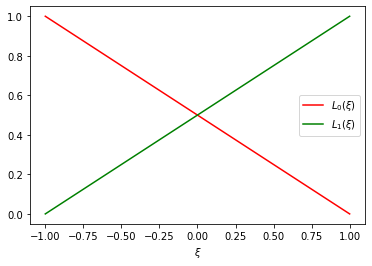

In [ ]:
xPlt = np.linspace(-1, 1, 10)            # Define a list of even separated points to plot the functions
plt.plot(xPlt, L0(xPlt), color='red')    # Plot the L0 Lagrange function
plt.plot(xPlt, L1(xPlt), color='green')  # Plot the L1 Lagrange function
plt.legend([r'$L_0(\xi)$',r'$L_1(\xi)$'])          # Add plot labels
plt.xlabel(r'$\xi$')                         # Add the label to the x axis
plt.show()                               # Show the plot

It is now possible to repeat the symbolic integration in the *natural coordinates*

In [ ]:
Xi=sym.symbols('Xi')
sym.integrate(f_sym(L0(Xi)*a+L1(Xi)*b)*(b-a)/2,[Xi,-1,1])

-0.333333333333333*a**3 + 0.333333333333333*b**3

The Gauss quadrature approximates an integral as
\begin{equation*}
 \int_{-1}^{1} f(\xi) d\xi \approx \sum_{i=1}^N w_i f(\xi_i)
\end{equation*}
and this quadrature gives the exact solution for a polynomial of degree $2N-1$

These weights $w_i$ and *natural coordinates* $\xi_i$ are tabulated and the first three groups are shown in the lists wiGauss and xiGauss at the begining of this notebook.

More information about the Gauss-Legendre quadrature can be found elsewhere, every Numerical Analysis textbook will have a chapter devoted to numerical integration. As a quick refrence you can also read the wikipedia entry in the following link https://en.wikipedia.org/wiki/Gaussian_quadrature

To calculate the quadrature it is necessary to explicitely define the integral limits. It should be emphasized that it is a *numerical integration*

In [ ]:
A=1.0;                                       # Inferior limit for the integration
B=5.0;                                       # Superior limit for the integration

Isym=sym.integrate(f_sym(x),[x,A,B])         # Integral using the symbolic function

N_gauss=3                                   # Define de number of Gauss points to do the numerical integration

xGaussCoordinate=np.zeros(N_gauss)                 # Array to store the actual x coordinate used in the quadrature
yGaussCoordinate=np.zeros(N_gauss)                 # Array to store the actual f(x) coordinate used in the quadrature
Inum=0                                       # Define the variable to store the result
for i in range(len(wiGauss[N_gauss-1])):     # Loop over the set of Gauss points
  xi=xiGauss[N_gauss-1][i]                   # Temporary variable for xi coordinate (just to make the code more readable)
  wi=wiGauss[N_gauss-1][i]                   # Temporary variable for wi weight (just to make the code more readable)
  xCoord=L0(xi)*A+L1(xi)*B                   # Actual x coordinate
  yCoord=f(xCoord)                           # function evaluated at the xCoord
  Inum+=wi*yCoord*(B-A)/2                    # Add the value for this Gauss point
  xGaussCoordinate[i]=xCoord                 #
  yGaussCoordinate[i]=yCoord                 #

print("Valor exacto:             ",Isym)                             # Print the result for the symbolic integration
print("Valor cuadratura de gauss:",Inum,"(con",N_gauss,"puntos)")    # Print the result for the numerical integration
print("Error:                    ",np.abs((Inum-Isym)/Isym*100),"%") # Error comparison

Valor exacto:              41.3333333333333
Valor cuadratura de gauss: 41.33333333333333 (con 3 puntos)
Error:                     0 %


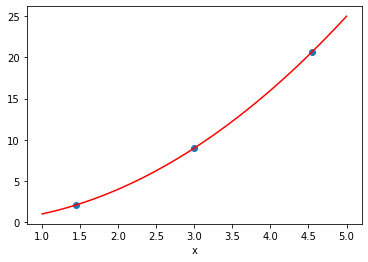

In [ ]:
xPlt = np.linspace(A, B, 100)                  # Define a list of even separated points to plot the functions
plt.plot(xPlt, f(xPlt), color='red')           # Plot the f(x) function
plt.scatter(xGaussCoordinate,yGaussCoordinate) # Plot the points used in the Gauss quadrature
plt.xlabel('x')                                # Add the label to the x axis
plt.show()                                     # Show the plot

Another numerical method used to calculate the integral is the trapezoidal rule.

This method splits the domain in segmentos of lenght $h$.
\begin{equation*}
 \int_a^b f(x)dx \approx \sum_{i=1}^{N_s}\frac{h}{2} (f(x_i)+f(x_{i+1}))
\end{equation*}
where $N_s$ is the number of segments

In [ ]:
Ns=2                            # Define the number of segmentes to use
h=(B-A)/Ns                      # Length of the segment to be used in the trapezoidal rule

x_trp=np.linspace(A,B,Ns+1)     # Discrete x space 
f_trp=f(x_trp)                  # Function evaluated at the discrete space points 

I_trp=0                                   # Variable to store the result
for i in range(Ns):                       # Loop over the discrete space
  I_trp+=h/2*(f(x_trp[i])+f(x_trp[i+1]))  # Trapezoidal rule

print("Analytical result:",Isym)                                        # Print the result for the symbolic integration
print("Trapezoidal rule: ",I_trp,"(using",Ns,"segments of size",h,")")  # Print the result for the numerical integration
print("Error:            ",np.abs((I_trp-Isym)/Isym*100),"%")           # Error comparison

Analytical result: 41.3333333333333
Trapezoidal rule:  44.0 (using 2 segments of size 2.0 )
Error:             6.45161290322582 %


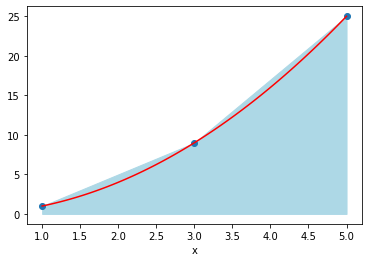

In [ ]:
xPlt = np.linspace(A, B, 100)                  # Define a list of even separated points to plot the functions
plt.plot(xPlt, f(xPlt), color='red')           # Plot the f(x) function
plt.fill_between(x_trp,0,f_trp,color='lightblue')                       # Plot the points used in the Gauss quadrature
plt.scatter(x_trp,f_trp)                       # Plot the points used in the Gauss quadrature
plt.xlabel('x')                                # Add the label to the x axis
plt.show()                                     # Show the plot